In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb  8 06:52:14 2021

@author: rafav
"""
from PIL import Image
from sklearn.cluster import KMeans
import imageio
import pandas as pd
import matplotlib.pyplot as plt

def return_data(lista_medoides):
    data=[]
    for l in range(len(lista_medoides)):
            for k in range(len(lista_medoides[l])):
                data.append(lista_medoides[l][k])
    return data

image=Image.open('flor.jpg')
image_vector= imageio.imread("flor.jpg")
data= return_data(image_vector)

y_kmeans8 = KMeans(n_clusters=8, random_state=0).fit(data)
k_maeans8 = y_kmeans8.labels_

y_kmeans64=KMeans(n_clusters=64, random_state=0).fit(data)
k_maeans64 = y_kmeans64.labels_

y_kmeans512=KMeans(n_clusters=512, random_state=0).fit(data)
k_maeans512 = y_kmeans512.labels_

def converter_centroide_inteiro_prox( y_kmeans):
    lista_cluster=[]
    for k in y_kmeans.cluster_centers_:
        lista_cluster.append([int("%1.f"%k[0]),int("%1.f"%k[1]),int("%1.f"%k[2])])
    return lista_cluster
   


def reconstruir_vetor_imagem(lista_cluster,y_kmeans):
    
    new_image=[]
    
    for k in y_kmeans8.labels_:
        new_image.append(lista_cluster[k])
    return new_image



def reconstruir_imagem(new_image_vector,image_vector):
    v=[]
    df=pd.DataFrame(new_image_vector)
    i=0
    f=518
    for d in range(len(image_vector)):
        v.append(df.iloc[i:f,:].values)
        i=f
        f=f+518
    
    return plt.imshow(v)





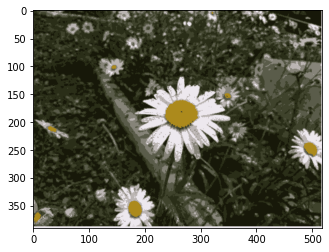

In [2]:
lista_cluster=converter_centroide_inteiro_prox( y_kmeans8)
new_image_vector=reconstruir_vetor_imagem(lista_cluster,y_kmeans8)
reconstruir_imagem(new_image_vector,image_vector)  


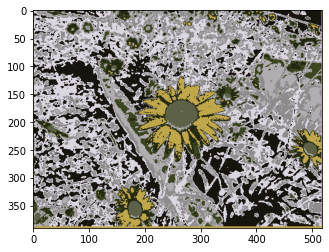

In [3]:
lista_cluster=converter_centroide_inteiro_prox(y_kmeans64)
new_image_vector=reconstruir_vetor_imagem(lista_cluster,y_kmeans64) 
reconstruir_imagem(new_image_vector,image_vector)





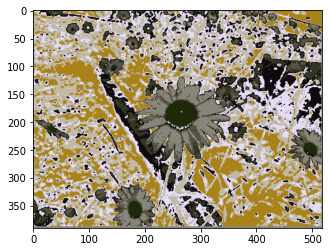

In [4]:
lista_cluster=converter_centroide_inteiro_prox(y_kmeans512)
new_image_vector=reconstruir_vetor_imagem(lista_cluster,y_kmeans512) 
reconstruir_imagem(new_image_vector,image_vector)
